# DASK

## Importar las librerias adecuadas.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

## Leer los CSV:

In [81]:
# Ingesta de datos
%time
bloques = 10
df_application = dd.read_csv(r'C:\Users\carpa\OneDrive\Documents\Cursos\UTEC Computer Science\Ciclo 2\Big Data\Credit Scoring\application_record.csv')

df_record = dd.read_csv(r'C:\Users\carpa\OneDrive\Documents\Cursos\UTEC Computer Science\Ciclo 2\Big Data\Credit Scoring\credit_record.csv')

Wall time: 0 ns


In [3]:
# Data Exploration in dt_ap
%time
df_application.head()

Wall time: 0 ns


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
%time
df_record.head()

Wall time: 0 ns


,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


Pre - procesamiento

In [106]:
# Análisis de valores duplicados
## Id's únicos dentro del dataframe df_application
%time
print("Cantidad de registros dentro de df_application:",df_application.shape[0].compute())
print("Cantidad de id's únicos dentro de df_application",df_application['ID'].nunique().compute())
## NO coincide la cantidad de registros únicos con la cantidad de registros dentro
## del dataframe

Wall time: 0 ns
Cantidad de registros dentro de df_application: 438510
Cantidad de id's únicos dentro de df_application 438510


In [107]:
## Los valores duplicados dentro del dataset serán eliminados
%time
df_application = df_application.drop_duplicates('ID', keep='last').compute() 
df_application = dd.from_pandas(df_application, npartitions=bloques)
type(df_application)

Wall time: 0 ns


dask.dataframe.core.DataFrame

In [84]:
## Id's únicos dentro del dataframe df_record
%time
print("Cantidad de registros dentro de df_record:",df_record.shape[0].compute())
print("Cantidad de id's únicos dentro de df_record",df_record['ID'].nunique().compute())
# NO coincide la cantidad de registros únicos con la cantidad de registros dentro
# porque son datos mensuales

Wall time: 0 ns
Cantidad de registros dentro de df_record: 1048575
Cantidad de id's únicos dentro de df_record 45985


In [108]:
## Número de id's que las dos tables comparten
%time
print(len(set(df_application["ID"]).intersection(set(df_record["ID"]))))

Wall time: 0 ns
36457


In [9]:
# Análisis de valores nulos df_application
%time
print("-----------Análisis de valores nulos df_application-------------------")
print(df_application.isnull().sum().compute())

Wall time: 0 ns
-----------Análisis de valores nulos df_application-------------------
ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134187
CNT_FAM_MEMBERS             0
dtype: int64


In [85]:
# El campo OCCUPATION_TYPE tiene gran cantidad de valores nulos
# no se tomará en cuenta este campo por dicha razón
df_application.drop('OCCUPATION_TYPE',axis=1).compute() 

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,2.0


In [11]:
# Análisis de valores nulos df_record
%time
print("-----------Análisis de valores nulos df_record-------------------")
print(df_record.isnull().sum().compute())

Wall time: 0 ns
-----------Análisis de valores nulos df_record-------------------
ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64


In [86]:
# Análisis de columnas que tengan valores categóricos
%time
df_application_cat = pd.DataFrame(df_application.dtypes == 'object').reset_index()
df_application_str = df_application_cat[df_application_cat[0]==True]['index']
df_application_str

1             CODE_GENDER
2            FLAG_OWN_CAR
3         FLAG_OWN_REALTY
6        NAME_INCOME_TYPE
7     NAME_EDUCATION_TYPE
8      NAME_FAMILY_STATUS
9       NAME_HOUSING_TYPE
16        OCCUPATION_TYPE
Name: index, dtype: object

In [87]:
%time
df_application_num = pd.DataFrame(df_application.dtypes != 'object').reset_index().\
rename(columns = {0:'yes/no'})
df_application_num = df_application_num[df_application_num['yes/no'] == True]['index']

In [88]:
%time
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_application = df_application.compute()
for x in df_application:
    if df_application[x].dtypes == 'object':
        df_application[x] = le.fit_transform(df_application[x])


In [89]:
df_application = dd.from_pandas(df_application, npartitions=bloques)

Wall time: 0 ns


<AxesSubplot:xlabel='ID', ylabel='DAYS_BIRTH'>

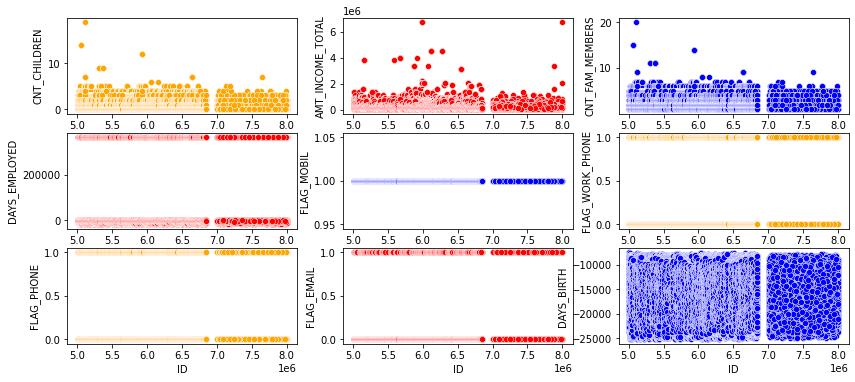

In [109]:
## Se halla que existen outliers en las columnas CNT_CHILDREN, AMT_INCOME_TOTAL y CNT_FAM_MEMBERS
%time
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df_application, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df_application, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df_application, ax=ax[0][2], color='blue')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df_application, ax=ax[1][0], color='red')
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df_application, ax=ax[1][1], color='blue')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df_application, ax=ax[1][2], color='orange')
sns.scatterplot(x='ID', y='FLAG_PHONE', data=df_application, ax=ax[2][0], color='orange')
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df_application, ax=ax[2][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df_application, ax=ax[2][2], color= 'blue')

In [18]:
#Depuración de outliers para el campo 'CNT_FAM_MEMBERS'
limite_superior = df_application['CNT_FAM_MEMBERS'].quantile(0.999).compute()
limite_inferior = df_application['CNT_FAM_MEMBERS'].quantile(0.001).compute()
df_application = df_application[(df_application['CNT_FAM_MEMBERS']<limite_superior) & (df_application['CNT_FAM_MEMBERS']>limite_inferior)].compute()

In [19]:
#Depuración de outliers para el campo 'CNT_CHILDREN'
limite_superior = df_application['CNT_CHILDREN'].quantile(0.999)
limite_inferior = df_application['CNT_CHILDREN'].quantile(0.001)
df_application = df_application[(df_application['CNT_CHILDREN']<limite_superior) & (df_application['CNT_CHILDREN']>limite_inferior)]

Wall time: 0 ns


<AxesSubplot:xlabel='ID', ylabel='DAYS_BIRTH'>

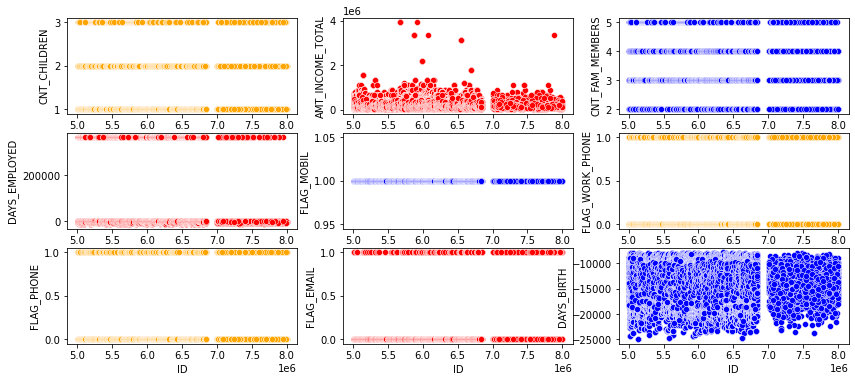

In [20]:
## Verificación de eliminación de outliers 'CNT_CHILDREN, AMT_INCOME_TOTAL y CNT_FAM_MEMBERS
%time
fig, ax= plt.subplots(nrows= 3, ncols = 3, figsize= (14,6))

sns.scatterplot(x='ID', y='CNT_CHILDREN', data=df_application, ax=ax[0][0], color= 'orange')
sns.scatterplot(x='ID', y='AMT_INCOME_TOTAL', data=df_application, ax=ax[0][1], color='red')
sns.scatterplot(x='ID', y='CNT_FAM_MEMBERS', data=df_application, ax=ax[0][2], color='blue')
sns.scatterplot(x='ID', y='DAYS_EMPLOYED', data=df_application, ax=ax[1][0], color='red')
sns.scatterplot(x='ID', y='FLAG_MOBIL', data=df_application, ax=ax[1][1], color='blue')
sns.scatterplot(x='ID', y='FLAG_WORK_PHONE', data=df_application, ax=ax[1][2], color='orange')
sns.scatterplot(x='ID', y='FLAG_PHONE', data=df_application, ax=ax[2][0], color='orange')
sns.scatterplot(x='ID', y='FLAG_EMAIL', data=df_application, ax=ax[2][1], color='red')
sns.scatterplot(x='ID', y='DAYS_BIRTH', data=df_application, ax=ax[2][2], color= 'blue')

In [91]:
## Dado que las dos tablas se deberán unir y el campo status del 
## df_record es lo que se debe predecir, se debe codificar
df_record = dd.read_csv(r'C:\Users\carpa\OneDrive\Documents\Cursos\UTEC Computer Science\Ciclo 2\Big Data\Credit Scoring\credit_record.csv')
df_record = df_record.compute()
df_record['STATUS'].replace({'C': 0, 'X' : 0},inplace=True)
df_record['STATUS'] = df_record['STATUS'].astype('int')
df_record['STATUS'] = df_record['STATUS'].apply(lambda x:1 if x >= 2 else 0)
df_record = dd.from_pandas(df_record, npartitions=bloques)


In [92]:
## Se observa que los datos nos stán balanceados
df_record['STATUS'].value_counts(normalize=True).compute()

0    0.99704
1    0.00296
Name: STATUS, dtype: float64

In [93]:
type(df_application), type(df_record)

(dask.dataframe.core.DataFrame, dask.dataframe.core.DataFrame)

In [94]:
# Unificación de las dos tablas
%time
#union = pd.merge(df_application, df_record, on="ID")
union = dd.from_pandas(df_application.join(df_record.set_index('ID').compute(), on='ID', how='inner').compute(),npartitions=100)
union.compute().info()

Wall time: 0 ns
<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 434812
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int32  
 2   FLAG_OWN_CAR         777715 non-null  int32  
 3   FLAG_OWN_REALTY      777715 non-null  int32  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int32  
 7   NAME_EDUCATION_TYPE  777715 non-null  int32  
 8   NAME_FAMILY_STATUS   777715 non-null  int32  
 9   NAME_HOUSING_TYPE    777715 non-null  int32  
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  F

In [95]:
type(union)

dask.dataframe.core.DataFrame

In [97]:
# Eliminación de columnas que no se usarán para el análisis
%time
union.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']).compute()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,18,2.0,0,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,18,2.0,-1,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,18,2.0,-2,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,18,2.0,-3,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,18,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434812,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,8,1.0,-9,0
434812,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,8,1.0,-10,1
434812,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,8,1.0,-11,0
434812,5150337,1,0,1,0,112500.0,4,4,3,4,-9188,-1193,8,1.0,-12,0


In [98]:
%time
union.head()

Wall time: 0 ns


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,0,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-1,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-2,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-3,0
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,1,0,0,18,2.0,-4,0


Wall time: 0 ns
El 60.9% no tiene un vehículo


<AxesSubplot:ylabel='FLAG_OWN_CAR'>

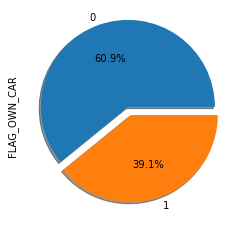

In [99]:
%time
print("El 60.9% no tiene un vehículo")
union['FLAG_OWN_CAR'].value_counts().compute().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

Wall time: 0 ns
Del total el 66.7% son mujeres


<AxesSubplot:ylabel='CODE_GENDER'>

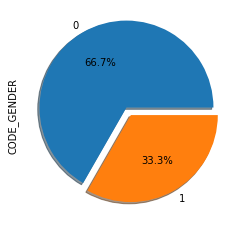

In [100]:
%time
print("Del total el 66.7% son mujeres")
union['CODE_GENDER'].value_counts().compute().plot(kind='pie', explode=(0.1,0), shadow=True, autopct='%1.1f%%')

In [101]:
%time
print("La mayoría no tiene hijos")
union['CNT_CHILDREN'].value_counts().compute()

Wall time: 0 ns
La mayoría no tiene hijos


0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64

In [102]:
%time
print("La mayoría de usuarios tiene dos familiares")
union['CNT_FAM_MEMBERS'].value_counts().compute()

Wall time: 0 ns
La mayoría de usuarios tiene dos familiares


2.0     423723
1.0     141477
3.0     134894
4.0      66990
5.0       8999
6.0       1196
7.0        273
15.0       111
9.0         46
20.0         6
Name: CNT_FAM_MEMBERS, dtype: int64

Wall time: 0 ns


<AxesSubplot:ylabel='CODE_GENDER,NAME_EDUCATION_TYPE'>

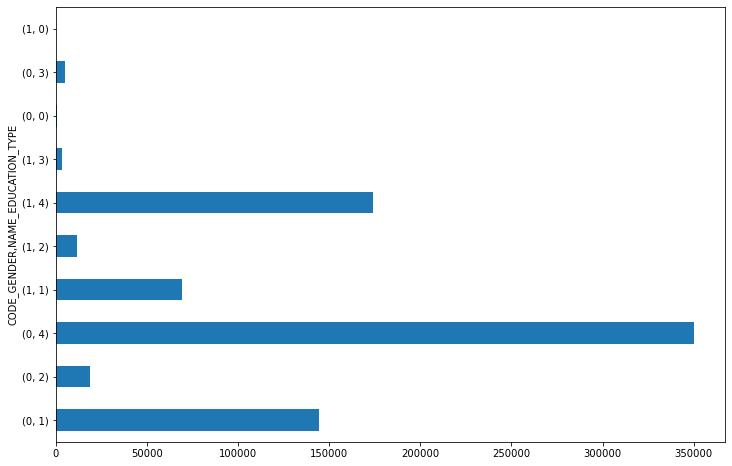

In [103]:
%time
union.groupby(['CODE_GENDER', 'NAME_EDUCATION_TYPE']).size().compute().plot(kind='barh', figsize = (12, 8))

In [104]:
## Cast de datos y eliminación de filas que contengan valores nulos
%time
union['AMT_INCOME_TOTAL'] = union['AMT_INCOME_TOTAL'].astype('int')
df_union = dd.from_pandas(union.dropna().compute(),npartitions=100)


Wall time: 0 ns


Wall time: 0 ns
Las familias que tienen dos hijos son las que mayor ingreso perciben


<AxesSubplot:ylabel='AMT_INCOME_TOTAL,CNT_FAM_MEMBERS'>

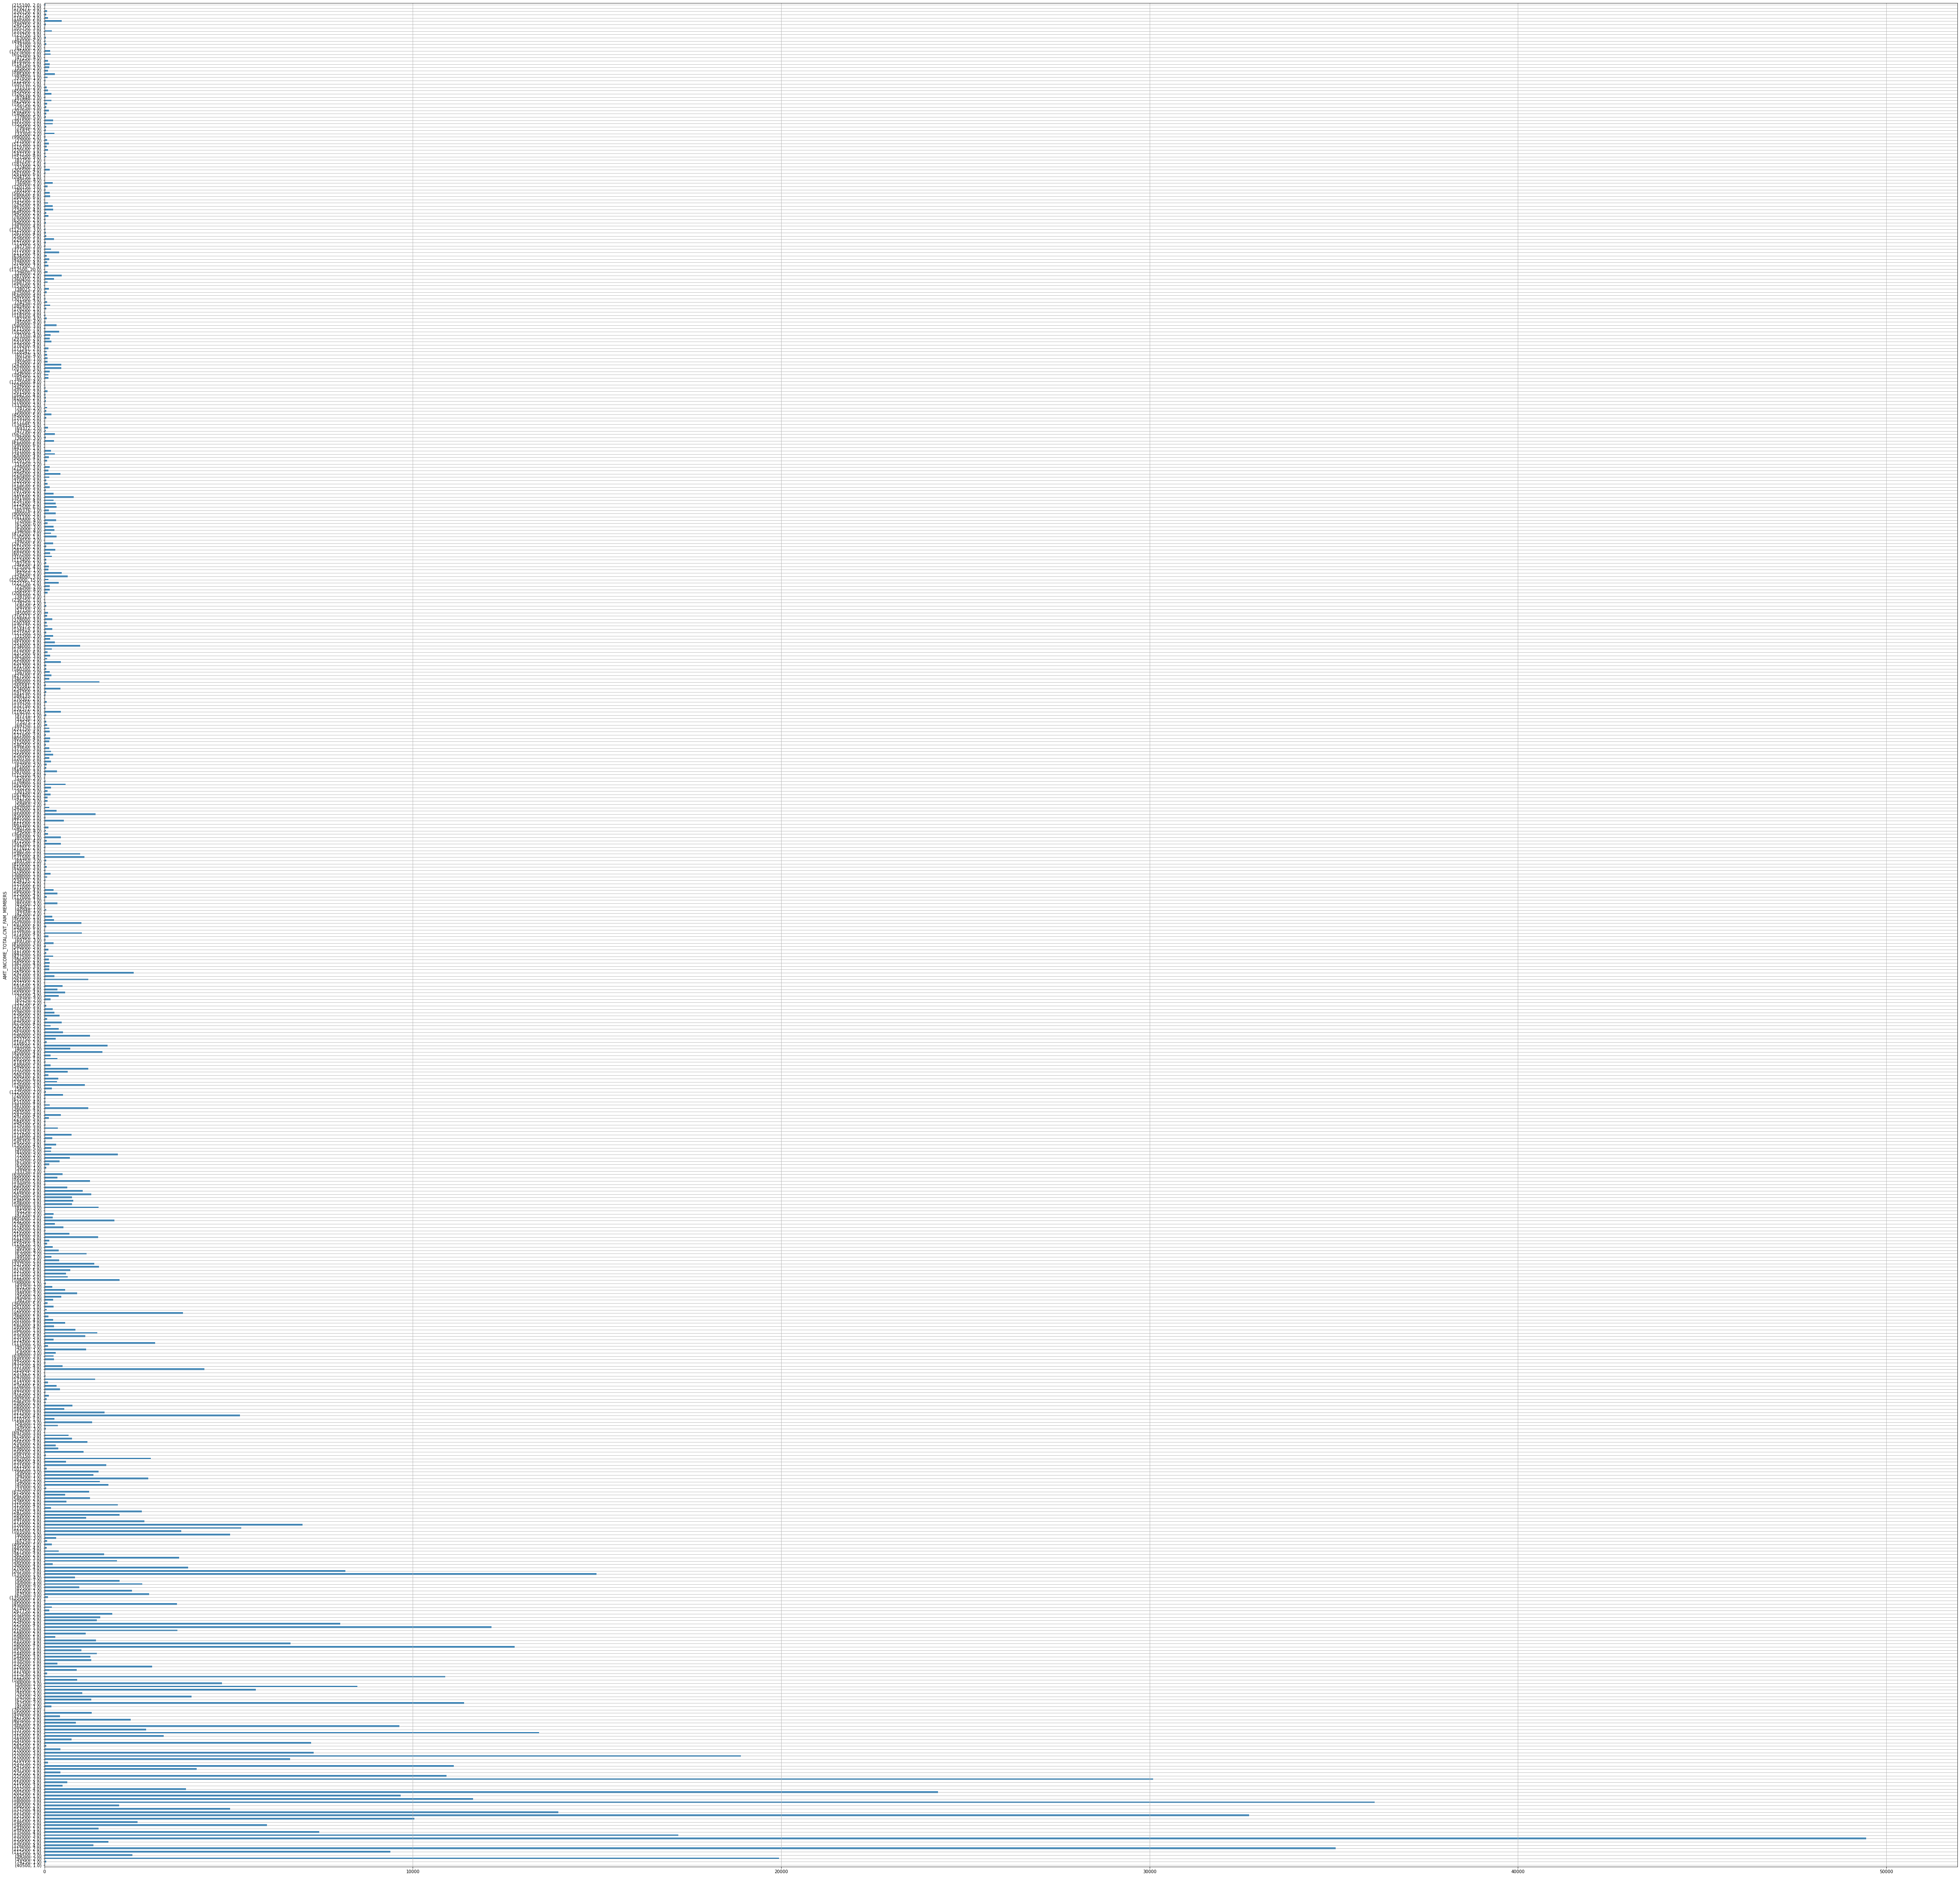

In [105]:
%time
print("Las familias que tienen dos hijos son las que mayor ingreso perciben")
df_union.groupby(['AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS']).size().compute().plot(kind='barh', figsize=(80, 80), grid=True)